In [2]:
import pandas as pd

In [3]:
dfs = []
for i in range(5):
    dfs.append(pd.read_excel(f'input/amazon_annotation_part{i}.xlsx'))

In [4]:
df_input = pd.concat(dfs)

In [5]:
df_input.head(2)

,erp_attr_name,erp_attr_value,wish_attr_name,wish_attr_value
0,Additional Features,Breakaway,NaN,NaN
1,Additional Features,Extendable,NaN,NaN


In [6]:
len(df_input)

49505

In [7]:
df_input['uniq_str'] = df_input['erp_attr_name'] + df_input['erp_attr_value']

In [8]:
len(set(df_input['uniq_str']))

49505

In [9]:
dfs = [] 
for i in [ 
    "output/7th March'23 ERP FC.xlsx", 
    "output/27th Feb'23 - 1st Mar'23 ERP Batch 2.xlsx", 
    "output/ERP Part 0 (22 Feb'23 - 26 Feb'23).xlsx", 
]:
    dfs += list(pd.read_excel(i, sheet_name=None).items())

In [10]:
df_output = pd.concat([
    dfs[0][1], dfs[1][1], dfs[2][1], dfs[3][1], dfs[5][1]
])

In [11]:
len(df_output)

71711

In [12]:
df_output = df_output[ 
    (df_output['erp_attr_name'].apply(lambda x: isinstance(x, str))) & \
    (df_output['erp_attr_value'].apply(lambda x: isinstance(x, str)))
]

In [13]:
len(df_output)

71657

In [14]:
df_output['uniq_str'] = df_output['erp_attr_name'] + df_output['erp_attr_value']
df_output = df_output.drop_duplicates('uniq_str', keep='first')

In [15]:
len(df_output)

49597

In [16]:
df_merge = df_input[['uniq_str']].merge(df_output, on='uniq_str', how='inner')

In [17]:
len(df_merge)

49501

In [18]:
set(df_output['uniq_str']) - set(df_merge['uniq_str'])

{'Additional Chemical Name1, Streptozotocin (streptozocin)',
 'Additional Chemical Name1,p-Chloro-o-toluidine, strong acid salts ofp-Chloro-o-toluidine strong acid salts of',
 'Additional Chemical Name10p-Chloroaniline',
 'Additional Chemical Name10p-Chloroaniline hydrochloride',
 'Additional Chemical Name11Phenacemide',
 'Additional Chemical Name11Phenacetin',
 'Additional Chemical Name12Pipobroman',
 'Additional Chemical Name12Pirimicarb',
 'Additional Chemical Name13Procarbazine',
 'Additional Chemical Name13Procarbazine hydrochloride',
 'Additional Chemical Name14Quizalofop-ethyl',
 'Additional Chemical Name14Radionuclides',
 'Additional Chemical Name15Simazine',
 'Additional Chemical Name15Sodium cyanide',
 'Additional Chemical Name16Sulindac',
 'Additional Chemical Name16Talc containing asbestiform fibers',
 'Additional Chemical Name17Tetrafluoroethylene',
 'Additional Chemical Name17Tetranitromethane',
 'Additional Chemical Name18Toxaphene (Polychlorinated camphenes)',
 'Additio

In [19]:
df_merge[~df_merge['custom_value'].isna()]

,uniq_str,Date,Sr No,erp_attr_name,erp_attr_value,wish_attr_name,wish_attr_value,Cust_Value,Comments,custom_value,comments
8396,SubjectLiterature & Fiction - Contemporary,NaT,NaN,Subject,Literature & Fiction - Contemporary,NaN,NaN,NaN,NaN,Literature & Fiction - Contemporary,Don't have Atribute value & Attribute name
9067,Aspect Ratio1:29:01,NaT,NaN,Aspect Ratio,1:29:01,NaN,NaN,NaN,NaN,1:29:01,Don't have Atribute value & Attribute name


In [20]:
df_merge = df_merge[['erp_attr_name', 'erp_attr_value', 'wish_attr_name', 'wish_attr_value', 'Cust_Value']].rename(
    columns={
        'Cust_Value': 'custom_attr_value'
    }
)

In [21]:
len(df_merge)

49501

In [22]:
len(set(df_merge[['erp_attr_name', 'erp_attr_value', 'wish_attr_name', 'wish_attr_value']].dropna().erp_attr_name))

365

In [23]:
len(set(df_merge[['erp_attr_name', 'erp_attr_value', 'wish_attr_name', 'wish_attr_value']].dropna().erp_attr_value))

5316

In [24]:
len(set(df_merge[['erp_attr_name', 'erp_attr_value', 'wish_attr_name', 'wish_attr_value']].dropna().wish_attr_name))

151

In [25]:
len(set(df_merge[['erp_attr_name', 'erp_attr_value', 'wish_attr_name', 'wish_attr_value']].dropna().wish_attr_value))

3503

In [26]:
df_merge

,erp_attr_name,erp_attr_value,wish_attr_name,wish_attr_value,custom_attr_value
0,Additional Features,Breakaway,NaN,NaN,NaN
1,Additional Features,Extendable,NaN,NaN,NaN
2,Additional Features,Memory,NaN,NaN,NaN
3,Additional Features,Power Folding,NaN,NaN,NaN
4,Additional Features,Puddle Lamp,NaN,NaN,NaN
...,...,...,...,...,...
49496,Headphone Fit,In-The-Ear,NaN,NaN,In-The-Ear
49497,Headphone Fit,Over-The-Ear,Compatible Brand/Model,NaN,Over-The-Ear
49498,Item Dimensions Unit Of Measure,Meters,NaN,NaN,Meters
49499,Item Display Diameter Unit Of Measure,Meters,NaN,NaN,Meters


In [27]:
df_attributes = pd.read_csv('../../../attribute_extraction_metadata_template/attribute_definition_top25L2_filtered_augmented_redacted_addedsinglemulti_01182023.csv')

In [28]:
df_attributes_orig = pd.read_csv('../../../attribute_extraction_metadata_template/Initial Attribute Definition for First Release - UPDATED SHEET .csv')

In [29]:
cats = set(df_attributes['category'])

In [30]:
df_attributes_orig_sub = df_attributes_orig[
    (df_attributes_orig.category.apply(lambda x: x in cats)) & (df_attributes_orig['entry mode'].apply(lambda x: x != 'free_text'))
]

In [31]:
from functools import reduce

In [32]:
df_attributes_orig_sub_group = df_attributes_orig_sub[['attribute_field', 'category_attributevalue']].groupby('attribute_field').agg({
    'category_attributevalue': lambda x: sorted(set(reduce(lambda x, y: x+y, [[str(j) for j in eval(i)] for i in x])))
}).reset_index()

In [33]:
df_attributes_group = df_attributes.groupby('attribute_field').agg({
    'category_attributevalue': lambda x: sorted(set(reduce(lambda x, y: x+y, [[str(j) for j in eval(i)] for i in x])))
}).reset_index()

In [34]:
attr_vals_normalized = {}
for i in df_attributes_group.to_dict('records'):
    attr_vals_normalized[i['attribute_field']] = set(i['category_attributevalue'])

attr_vals_orig_normalized = {}
for i in df_attributes_orig_sub_group.to_dict('records'):
    attr_vals_orig_normalized[i['attribute_field']] = set(i['category_attributevalue'])

all_kvpairs = set()
all_orig_kvpairs = set()

for k in attr_vals_normalized:
    for v in attr_vals_normalized[k]:
        all_kvpairs.add((k, v))

for k in attr_vals_orig_normalized:
    for v in attr_vals_orig_normalized[k]:
        all_orig_kvpairs.add((k, v))

In [35]:
len(attr_vals_normalized), len(attr_vals_orig_normalized)

(230, 193)

In [36]:
len(all_kvpairs), len(all_orig_kvpairs)

(13592, 6875)

In [37]:
df_merge

,erp_attr_name,erp_attr_value,wish_attr_name,wish_attr_value,custom_attr_value
0,Additional Features,Breakaway,NaN,NaN,NaN
1,Additional Features,Extendable,NaN,NaN,NaN
2,Additional Features,Memory,NaN,NaN,NaN
3,Additional Features,Power Folding,NaN,NaN,NaN
4,Additional Features,Puddle Lamp,NaN,NaN,NaN
...,...,...,...,...,...
49496,Headphone Fit,In-The-Ear,NaN,NaN,In-The-Ear
49497,Headphone Fit,Over-The-Ear,Compatible Brand/Model,NaN,Over-The-Ear
49498,Item Dimensions Unit Of Measure,Meters,NaN,NaN,Meters
49499,Item Display Diameter Unit Of Measure,Meters,NaN,NaN,Meters


In [ ]:
import numpy as np

In [44]:
isinstance(i['wish_attr_name'], str)

False

In [47]:
recs = []
for i in df_merge.to_dict('records'):
    if isinstance(i['wish_attr_name'], str):
        if isinstance(i['wish_attr_value'], str):
            k, v = i['wish_attr_name'].strip(), i['wish_attr_value'].strip()
            if k in attr_vals_orig_normalized and v in attr_vals_orig_normalized[k]:
                i['attr_name_value_pairs_normalized'] = [(k, v)]
                i['attr_name_value_pairs_custom'] = []
            else:
                i['attr_name_value_pairs_normalized'] = []
                i['attr_name_value_pairs_custom'] = [(k, v)]
        elif isinstance(i['custom_attr_value'], str):
            k, v = i['wish_attr_name'].strip(), i['custom_attr_value'].strip()
            if k in attr_vals_orig_normalized and v in attr_vals_orig_normalized[k]:
                i['attr_name_value_pairs_normalized'] = [(k, v)]
                i['attr_name_value_pairs_custom'] = []
            else:
                i['attr_name_value_pairs_normalized'] = []
                i['attr_name_value_pairs_custom'] = [(k, v)]
        else:
            i['attr_name_value_pairs_normalized'] = []
            i['attr_name_value_pairs_custom'] = []
    else:
        i['attr_name_value_pairs_normalized'] = []
        i['attr_name_value_pairs_custom'] = []
    recs.append(i)

df_merge = pd.DataFrame(recs)

In [49]:
df = df_merge

In [50]:
df['attr_name_value_pairs_normalized'].apply(len).mean(), df['attr_name_value_pairs_custom'].apply(len).mean()

(0.14611826023716692, 0.14086584109411932)

<Axes: ylabel='Frequency'>

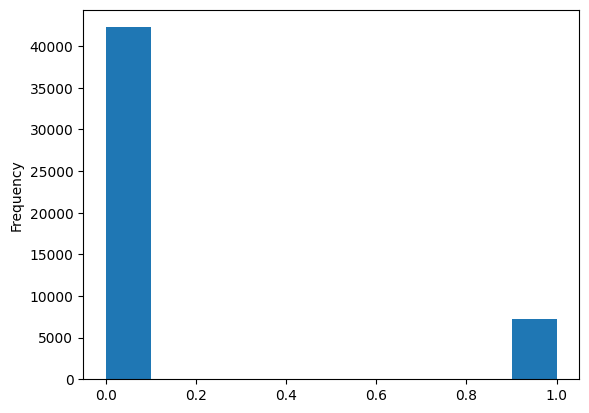

In [51]:
df['attr_name_value_pairs_normalized'].apply(len).plot.hist()

<Axes: ylabel='Frequency'>

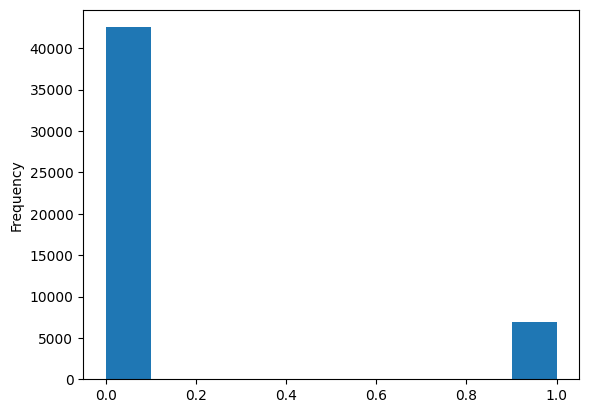

In [52]:
df['attr_name_value_pairs_custom'].apply(len).plot.hist()

In [53]:
normalized_attributes = reduce(lambda x,y: x+y, df['attr_name_value_pairs_normalized'].apply(lambda x: [i[0] for i in x]))
custom_attributes = reduce(lambda x,y: x+y, df['attr_name_value_pairs_custom'].apply(lambda x: [i[0] for i in x]))

In [54]:
normalized_kvpairs = reduce(lambda x,y: x+y, df['attr_name_value_pairs_normalized'])
custom_kvpairs = reduce(lambda x,y: x+y, df['attr_name_value_pairs_custom'])

In [55]:
len(set(normalized_attributes)), len(set(custom_attributes))

(128, 139)

In [56]:
len(set(normalized_kvpairs)), len(set(custom_kvpairs))

(3524, 5614)

In [58]:
from collections import Counter

In [59]:
Counter(normalized_attributes).most_common(5)

[('Materials', 2107),
 ('Main Stone', 437),
 ('Size', 377),
 ('Item Features', 371),
 ('Styles', 300)]

In [60]:
Counter(custom_attributes).most_common(5)

[('Materials', 1744),
 ('Compatible Brand/Model', 567),
 ('Item Type', 467),
 ('Binding', 299),
 ('Size', 269)]

In [61]:
Counter(normalized_kvpairs).most_common(5)

[(('Materials', 'Nylon'), 36),
 (('Materials', 'Wood'), 36),
 (('Materials', 'Leather'), 33),
 (('Materials', 'Stainless Steel'), 33),
 (('Materials', 'Plastic'), 32)]

In [62]:
Counter(custom_kvpairs).most_common(5)

[(('Compatible Brand/Model', 'Motorola'), 126),
 (('Compatible Brand/Model', 'Samsung'), 74),
 (('Compatible Brand/Model', 'Nokia'), 67),
 (('Compatible Brand/Model', 'LG'), 22),
 (('Compatible Brand/Model', 'Sony Ericsson'), 17)]

In [63]:
len(set(normalized_attributes)) / len(attr_vals_orig_normalized) # normalized original no free-text

0.6632124352331606

In [64]:
len(set(custom_attributes).union(set(normalized_attributes))) / len(attr_vals_normalized) # add in augmented free-text attributes

0.7478260869565218

In [65]:
len(set(normalized_kvpairs).intersection(all_orig_kvpairs)) / len(all_orig_kvpairs) # normalized original no free-text

0.5125818181818181

In [66]:
len((set(normalized_kvpairs).union(custom_kvpairs)).intersection(all_kvpairs)) / len(all_kvpairs) # add in augmented free-text attributes

0.2696439081812831

In [67]:
any(['|' in i[0] for i in all_kvpairs]), any(['|' in i[1] for i in all_kvpairs]), any(['\n' in i[0] for i in all_kvpairs]), any(['\n' in i[1] for i in all_kvpairs])

(False, False, False, False)

In [68]:
df['attr_name_value_pairs_normalized_text'] = df['attr_name_value_pairs_normalized'].apply(lambda x: '\n'.join([i[0] + '|' + i[1] for i in x]))

In [71]:
df_out = df

In [72]:
df_out.loc[df_out.attr_name_value_pairs_normalized_text.apply(lambda x: len(x) == 0), "attr_name_value_pairs_normalized_text_addunk"] = 'unknown'
df_out.loc[df_out.attr_name_value_pairs_normalized_text.apply(lambda x: len(x) != 0), "attr_name_value_pairs_normalized_text_addunk"] = \
    df_out.loc[df_out.attr_name_value_pairs_normalized_text.apply(lambda x: len(x) != 0), "attr_name_value_pairs_normalized_text"]

<Axes: ylabel='attr_name_value_pairs_normalized_text_addunk'>

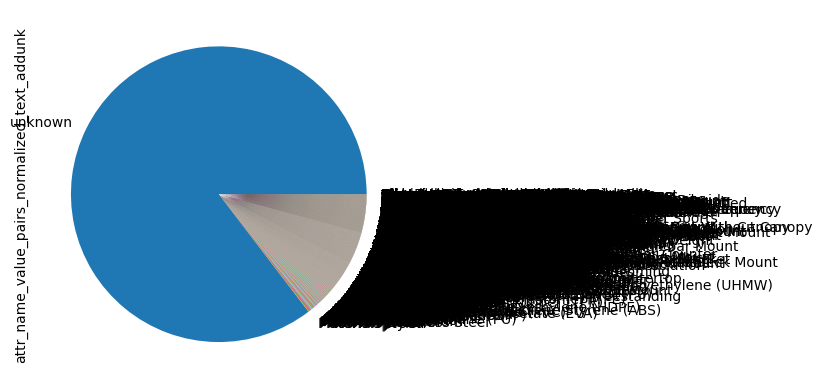

In [74]:
df_out.attr_name_value_pairs_normalized_text_addunk.value_counts().plot.pie()

In [75]:
from sklearn.model_selection import train_test_split

In [81]:
df_out['query'] = df_out['erp_attr_name'] + ': ' + df_out['erp_attr_value']

In [82]:
train, _ = train_test_split(df_out, test_size=.2, random_state=42)
val, test = train_test_split(_, test_size=0.5, random_state=42)

In [83]:
len(train), len(val), len(test)

(39600, 4950, 4951)

In [84]:
train

,erp_attr_name,erp_attr_value,wish_attr_name,wish_attr_value,custom_attr_value,attr_name_value_pairs_normalized,attr_name_value_pairs_custom,attr_name_value_pairs_normalized_text,attr_name_value_pairs_normalized_text_addunk,query
41082,Material Type,minteral wool,Materials,Wool,NaN,"[(Materials, Wool)]",[],Materials|Wool,Materials|Wool,Material Type: minteral wool
11838,Sport Type,Camping and Hiking,Sport or Activity Type,Camping and Hiking,NaN,"[(Sport or Activity Type, Camping and Hiking)]",[],Sport or Activity Type|Camping and Hiking,Sport or Activity Type|Camping and Hiking,Sport Type: Camping and Hiking
4289,Additional Chemical Name4,Lovastatin,NaN,NaN,"Additional Chemical Name4 , Lovastatin",[],[],,unknown,Additional Chemical Name4: Lovastatin
37676,Thread Size,M8-1,NaN,NaN,NaN,[],[],,unknown,Thread Size: M8-1
6663,Liquid Volume Unit,liter,NaN,NaN,Liquid Volume Unit,[],[],,unknown,Liquid Volume Unit: liter
...,...,...,...,...,...,...,...,...,...,...
11284,Country/Region as Labeled,Oman,NaN,NaN,NaN,[],[],,unknown,Country/Region as Labeled: Oman
44732,Material Type,Polyurethane foam,Materials,Polyurethane (PU),NaN,"[(Materials, Polyurethane (PU))]",[],Materials|Polyurethane (PU),Materials|Polyurethane (PU),Material Type: Polyurethane foam
38158,Metal Type,Cobalt,NaN,NaN,NaN,[],[],,unknown,Metal Type: Cobalt
860,Gap Size Unit,IN,NaN,NaN,NaN,[],[],,unknown,Gap Size Unit: IN


In [85]:
train.to_json('processed/offshore_amazon_erp_attr_train.json', lines=True, orient='records')
val.to_json('processed/offshore_amazon_erp_attr_val.json', lines=True, orient='records')
test.to_json('processed/offshore_amazon_erp_attr_test.json', lines=True, orient='records')